## Curso Analise de Dados - LIneA
Foi utilizado no curso o exemplo de dados de caso de dengue entre 2010 - 2019. Este notebook foi criado para solucionar a questão 10 do formulário de participação do curso.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Importar os dados do github

In [3]:
df_dengue = pd.read_csv("https://raw.githubusercontent.com/helenocampos/curso_aplicacao_cientifica/refs/heads/main/data_2000_2019.csv")
df_dengue

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


Separar somente os dados de mesoregiões para análise separada. Note que é selecionado somente os dados mais recentes de cada região.

In [4]:
df_meso = df_dengue.drop_duplicates(subset=['meso_code'], keep = 'last')
df_meso

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
133363,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,240,0.0,84771.0,2.079948,30.243567,21.831457,-1.505383,72.31,27.43,0.0873
133369,11008,Colorado Oeste,COLORADO DO OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,240,12.0,47077.0,3.212773,31.036070,21.412008,-3.956772,65.39,38.42,0.1397
133371,12002,Tarauac<e1>,TARAUACÁ,1201,Vale Do Juruá,12,Acre,1,North,5,...,240,388.0,85664.0,1.601241,31.205145,21.725334,-0.475372,51.19,27.53,0.3492
133374,12005,Brasil<e9>ia,BRASILÉIA,1202,Vale Do Acre,12,Acre,1,North,5,...,240,315.0,71429.0,4.497523,30.797890,21.417437,-2.053054,66.23,52.86,0.5020
133376,13002,Japur<e1>,JAPURÁ,1301,Norte Amazonense,13,Amazonas,1,North,5,...,240,0.0,20979.0,0.288861,31.126339,21.851940,1.491973,48.36,47.59,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133905,52005,Chap.Veadeiros,CHAPADA DOS VEADEIROS,5202,Norte Goiano,52,Goiás,5,Centre-West,2,...,240,32.0,69670.0,3.271107,30.855989,21.887304,-2.777776,67.23,69.74,0.4147
133910,52010,Goi<e2>nia,GOIÂNIA,5203,Centro Goiano,52,Goiás,5,Centre-West,2,...,240,2598.0,2543086.0,376.478541,30.404606,21.117405,-1.961784,98.14,81.82,0.5752
133912,52012,Ent.Bras<ed>lia,ENTORNO DE BRASÍLIA,5204,Leste Goiano,52,Goiás,5,Centre-West,2,...,240,253.0,1287675.0,33.747132,29.606134,20.672365,-2.003345,89.63,75.98,0.4468
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


Observar visualmente a correlação entre os casos de dengue e o acesso e escassez de água.

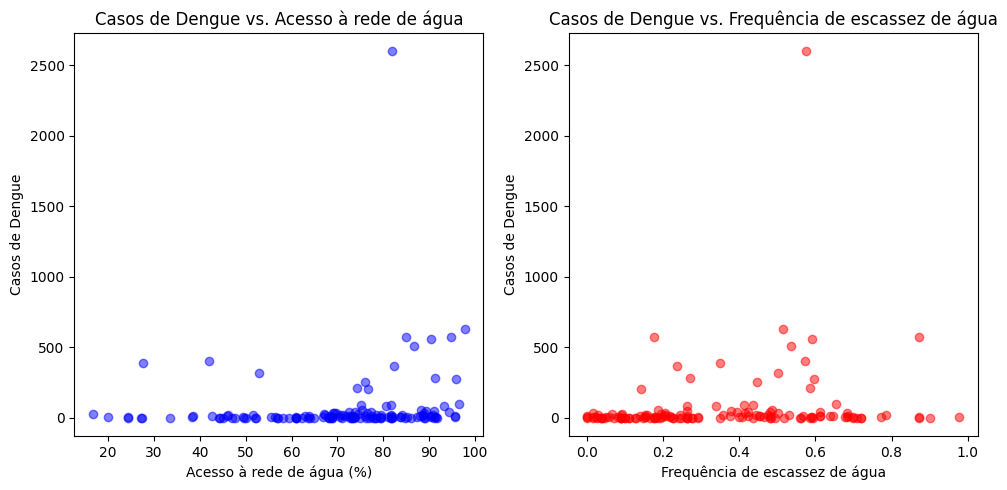

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(df_meso['water_network'], df_meso['dengue_cases'], color='blue', alpha=0.5)
axes[0].set_xlabel('Acesso à rede de água (%)')
axes[0].set_ylabel('Casos de Dengue')
axes[0].set_title('Casos de Dengue vs. Acesso à rede de água')

axes[1].scatter(df_meso['water_shortage'], df_meso['dengue_cases'], color='red', alpha=0.5)
axes[1].set_xlabel('Frequência de escassez de água')
axes[1].set_ylabel('Casos de Dengue')
axes[1].set_title('Casos de Dengue vs. Frequência de escassez de água')

plt.tight_layout() 
plt.show() 

Cálculo da matriz de correlação para melhor análise.

In [36]:
columns = ['dengue_cases', 'water_network', 'water_shortage']
df_meso_cor = df_meso[['dengue_cases', 'water_network', 'water_shortage']]

df_meso_cor.corr()

,dengue_cases,water_network,water_shortage
dengue_cases,1.000000,0.140393,0.161784
water_network,0.140393,1.000000,0.213535
water_shortage,0.161784,0.213535,1.000000
